In [2]:
import spacy, nltk, gensim, sklearn
import pandas as pd

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [7]:
year = 2016 # available: from 2015 to 2020
PATH_DATA = './data/data_nlp/'
QUOTES_FILE = PATH_DATA + f'quotes-{year}-filtered.json.bz2'
CHUNK_SIZE = 5000

reader = pd.read_json(QUOTES_FILE, lines=True, compression='bz2', chunksize=CHUNK_SIZE, typ='frame')

for chunk in reader:
    df_0 = chunk
    break
df_0

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2016-05-16-000278,[ Malia ] knows what she is going to do. They ...,Paul Bryant,[Q2059029],2016-05-16 11:44:37,1,"[[Paul Bryant, 0.9197], [None, 0.0803]]",[http://walb.com/story/31980641/some-colleges-...,E
1,2016-12-12-000423,[ t ] o fail to acknowledge even our most basi...,None,[],2016-12-12 16:59:39,1,"[[None, 0.7828], [Tuan Anh, 0.2172]]",[http://cnsnews.com/commentary/lynn-wardle/ark...,E
2,2016-09-23-000654,... the abortion pill really shows how unworka...,None,[],2016-09-23 13:53:34,1,"[[None, 0.9435], [Ruth Coppinger, 0.0565]]",[http://www.universityobserver.ie/news/ruth-co...,E
3,2016-04-29-000706,[ W ] omen who carry unwanted pregnancies to t...,None,[],2016-04-29 23:17:07,1,"[[None, 0.8603], [Sheila Solon, 0.1397]]",[http://grist.org/living/slide-into-my-dms-and...,E
4,2016-01-01-000274,"(1) the allegations underlying this matter, wh...",None,[],2016-01-01 02:44:51,1,"[[None, 0.7972], [Camille Cosby, 0.2028]]",[http://www.bostonglobe.com/metro/2015/12/31/w...,E
...,...,...,...,...,...,...,...,...,...
4995,2016-08-22-075227,She walks and breathes and you can't stop star...,None,[],2016-08-22 07:44:52,1,"[[None, 0.7862], [Judi Dench, 0.1372], [George...",[http://tallahassee.com/story/entertainment/20...,E
4996,2016-05-09-072733,"She wanted to have a glow for the red carpet,",None,[],2016-05-09 14:54:26,3,"[[None, 0.7656], [Kim Kardashian, 0.2344]]",[http://dailycaller.com/2016/05/09/kim-kardash...,E
4997,2016-09-15-096186,"She wants to hurt me,",None,[],2016-09-15 07:25:29,1,"[[None, 0.9091], [Peter Weber, 0.0909]]",[http://theweek.com/speedreads/648952/heres-st...,E
4998,2016-05-07-042258,SHE WAS A GIFTED INSTRUCTOR WHO TAUGHT SCIENCE...,None,[],2016-05-07 10:45:30,6,"[[None, 0.681], [Tim Cruz, 0.1453], [John Hann...",[http://wcvb.com/news/quincy-college-professor...,E


In [8]:
#Putting all the quotes in one corpus
text = ""

for quote in df_0.quotation:
    text = text + ' ' + quote

#Removing the new lines
text = " ".join(text.split())
text[:600]

"[ Malia ] knows what she is going to do. They have a plan for her and her family feels comfortable knowing that it's not something unstructured, [ t ] o fail to acknowledge even our most basic biological differences -- such as the fact that a mother must be present at birth but the father need not be -- risks making the guarantee of equal protection superficial, and so disserving it. Mechanistic classification of all our differences as stereotypes would operate to obscure those misconceptions and prejudices that are real. The distinction embodied in the statutory scheme here at issue is not ma"

In [24]:
nlp = spacy.load('en_core_web_sm')

In [25]:
PATH = PATH_DATA + 'stopword_list.csv'
sw = pd.read_csv(PATH, header=None)
sw


,0,1,2,3,4
0,a's,able,about,above,according
1,accordingly,across,actually,after,afterwards
2,again,against,ain't,all,allow
3,allows,almost,alone,along,already
4,also,although,always,am,among
...,...,...,...,...,...
104,why,will,willing,wish,with
105,within,without,won't,wonder,would
106,wouldn't,yes,yet,you,you'd
107,you'll,you're,you've,your,yours


In [26]:
#loading default spacy stopword list
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

#creating new stopword list
sw_list = list(sw[0]) + list(sw[1]) + list(sw[2]) + list(sw[3]) + list(sw[4]) + list(spacy_stopwords)
nlp.Defaults.stop_words = sw_list

print(len(nlp.Defaults.stop_words))

#crearing a spacy object
doc = nlp(text)


871


In [27]:
tokens = [token.text for token in doc]
len(tokens)

176970

In [28]:
#number of stopwords detected in text
stop_words = [token.text for token in doc if token.is_stop]
len(stop_words)


100473

In [29]:
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
len(words)

57070

In [30]:
from collections import Counter
# five most common tokens
word_freq = Counter(words)
word_freq.most_common()
print(word_freq.most_common(100))

[('women', 604), ('people', 367), ('time', 335), ('woman', 269), ('years', 207), ('life', 200), ('year', 194), ('good', 193), ('lot', 190), ('girls', 189), ('family', 183), ('mother', 183), ('work', 180), ('great', 178), ('girl', 168), ('love', 162), ('day', 159), ('wife', 152), ('men', 149), ('things', 129), ('thing', 129), ('told', 128), ('dollars', 127), ('Clinton', 124), ('world', 122), ('children', 119), ('home', 118), ('person', 118), ('wanted', 114), ('daughter', 109), ('man', 109), ('country', 108), ('young', 106), ('kind', 103), ('Hillary', 103), ('sexual', 99), ('hard', 98), ('feel', 94), ('child', 91), ('support', 91), ('sex', 90), ('female', 88), ('team', 87), ('long', 86), ('working', 85), ('Trump', 83), ('big', 81), ('knew', 81), ('mom', 79), ('sister', 77), ('marriage', 75), ('play', 75), ('school', 73), ('important', 73), ('thought', 73), ('married', 73), ('kids', 73), ('money', 73), ('started', 70), ('happy', 70), ('real', 69), ('job', 69), ('times', 68), ('felt', 68),

***SENTIMENT ANALYSIS USING VADER***

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

sia = SentimentIntensityAnalyzer()

In [32]:
#Adding a score column and a coumpound column to every quote
df_0['scores'] = df_0['quotation'].apply(lambda quote: sia.polarity_scores(quote))
df_0['compound']  = df_0['scores'].apply(lambda score_dict: score_dict['compound'])


df_0.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,scores,compound
0,2016-05-16-000278,[ Malia ] knows what she is going to do. They ...,Paul Bryant,[Q2059029],2016-05-16 11:44:37,1,"[[Paul Bryant, 0.9197], [None, 0.0803]]",[http://walb.com/story/31980641/some-colleges-...,E,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.5106
1,2016-12-12-000423,[ t ] o fail to acknowledge even our most basi...,None,[],2016-12-12 16:59:39,1,"[[None, 0.7828], [Tuan Anh, 0.2172]]",[http://cnsnews.com/commentary/lynn-wardle/ark...,E,"{'neg': 0.125, 'neu': 0.794, 'pos': 0.081, 'co...",-0.8012
2,2016-09-23-000654,... the abortion pill really shows how unworka...,None,[],2016-09-23 13:53:34,1,"[[None, 0.9435], [Ruth Coppinger, 0.0565]]",[http://www.universityobserver.ie/news/ruth-co...,E,"{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'comp...",-0.5574
3,2016-04-29-000706,[ W ] omen who carry unwanted pregnancies to t...,None,[],2016-04-29 23:17:07,1,"[[None, 0.8603], [Sheila Solon, 0.1397]]",[http://grist.org/living/slide-into-my-dms-and...,E,"{'neg': 0.178, 'neu': 0.822, 'pos': 0.0, 'comp...",-0.6369
4,2016-01-01-000274,"(1) the allegations underlying this matter, wh...",None,[],2016-01-01 02:44:51,1,"[[None, 0.7972], [Camille Cosby, 0.2028]]",[http://www.bostonglobe.com/metro/2015/12/31/w...,E,"{'neg': 0.0, 'neu': 0.97, 'pos': 0.03, 'compou...",0.0323


Text(0, 0.5, 'Number of sentences')

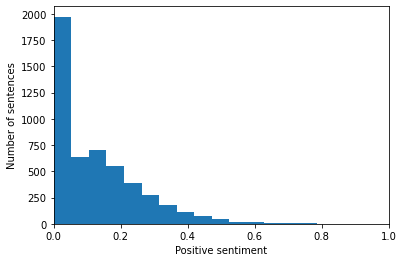

In [37]:
positive_sent = []
#iterate through the sentences, get polarity scores, choose a value
[positive_sent.append(sia.polarity_scores(quote)['pos']) for quote in df_0.quotation]
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])

plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

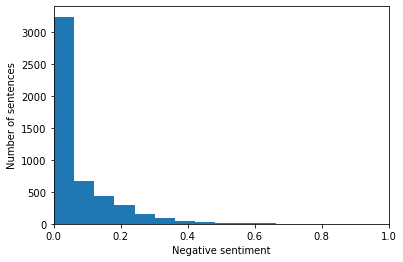

In [41]:
negative_sent = []
[negative_sent.append(sia.polarity_scores(quote)['neg']) for quote in df_0.quotation]
plt.hist(negative_sent,bins=15)
plt.xlim([0,1])
plt.xlabel('Negative sentiment')
plt.ylabel('Number of sentences')

Text(0, 0.5, 'Number of sentences')

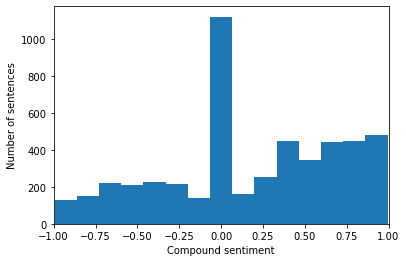

In [53]:
total_sent = []
[total_sent.append(sia.polarity_scores(quote)['compound']) for quote in df_0.quotation]
plt.hist(total_sent,bins = 15)
plt.xlim([-1,1])
plt.xlabel('Compound sentiment')
plt.ylabel('Number of sentences')

In [50]:
sents = [sia.polarity_scores(quote)['compound'] for quote in df_0.quotation]
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))

Number of positive sentences: 2601
Number of negative sentences: 1326
Number of neutral sentences: 1073
